# Outline
### In this project, I will:
- Import the dataset
- Conduct exploratory data analysis (EDA)
- Clean the data
- Feature engineering and selection
- Build a simple prediction model
- Evaluate the model

## 1. Import the Data

In [1]:
import pandas as pd

train_data = pd.read_csv('Data-set/train.csv')
test_data = pd.read_csv('Data-set/test.csv')

## 2. Exploratory Data Analysis (EDA)

- This includes understanding the data types for each column, investigating missing values, and visualizing the data.

In [2]:
# Get a quick overview of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Use seaborn for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

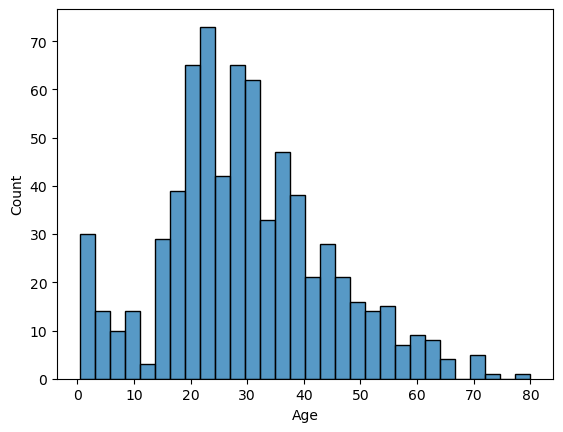

In [4]:
# Plot a histogram of the 'Age' column
sns.histplot(train_data['Age'].dropna(), kde=False, bins=30)
plt.show()

## 3. Data Cleaning
- Data cleaning can involve a variety of processes, including handling missing values, removing duplicates, and changing data types.

In [5]:
# Fill missing age data with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [6]:
# Convert 'Sex' to a binary indicator variable (0 = male, 1 = female)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

## 4. Feature Engineering and Selection
- In this stage, we transform existing features or create new ones to improve our model's performance.

In [7]:
# Create a 'FamilySize' feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# 5. Model Building
- Let's use a simple logistic regression model from scikit-learn library for this task.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
# Define our features and target
features = ['Pclass', 'Sex', 'Age', 'FamilySize']
target = 'Survived'

In [10]:
# Split our data
X_train, X_test, y_train, y_test = train_test_split(
    train_data[features], 
    train_data[target], 
    test_size=0.2, 
    random_state=42
)

In [11]:
# Initialize our classifier
clf = LogisticRegression()

In [12]:
# Fit our classifier
clf.fit(X_train, y_train)

LogisticRegression()

## 6. Model Evaluation
- Finally, we'll want to evaluate how well our model is performing.

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
# Make predictions
y_pred = clf.predict(X_test)

In [15]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.8044692737430168
